In [7]:
!pip install selenium

In [1]:
# string 형태 input을 넣으면, 정확한 메뉴명 추출해서 list형태로 return
def split_menu(menu):
    menu = menu[13:-11]
    while menu.find('(') != -1:
        start_index = menu.find('(')
        bracket_count = 1
        index_itr = start_index
        while bracket_count != 0:
            index_itr += 1
            if menu[index_itr] == '(':
                bracket_count += 1
            elif menu[index_itr] == ')':
                bracket_count -= 1
        end_index = index_itr
        menu = menu[:start_index] + menu[end_index:]
    while menu.find('（') != -1:
        start_index = menu.find('（')
        bracket_count = 1
        index_itr = start_index
        while bracket_count != 0:
            index_itr += 1
            if menu[index_itr] == '（':
                bracket_count += 1
            elif menu[index_itr] == '）':
                bracket_count -= 1
        end_index = index_itr
        menu = menu[:start_index] + menu[end_index:]
    menu = menu.split(',')
    for i in range(len(menu)):
        menu[i] = menu[i].split('/')[0]
    return menu

In [2]:
# list 형태 input을 넣으면, 각 메뉴별 주문량 카운팅
# return 하지않고 전역변수 split_menu_dict={}에 저장
# [주문량, 토탈별점, 맛별점, 양별점, 배달별점]
def dict_menu(input):
    
    for i in range(len(input)):
        if input[i] not in split_menu_dict:
            
            split_menu_dict[input[i]]=[0,0,0,0,0]
            
            split_menu_dict[input[i]][0]=1
            
            split_menu_dict[input[i]][1]=total_score
            split_menu_dict[input[i]][2]=taste_score
            split_menu_dict[input[i]][3]=quantity_score
            split_menu_dict[input[i]][3]=delivery_score
        
        else:
            split_menu_dict[input[i]][0]=split_menu_dict[input[i]][0]+1
            
            split_menu_dict[input[i]][1]=split_menu_dict[input[i]][1]+total_score
            split_menu_dict[input[i]][2]=split_menu_dict[input[i]][2]+taste_score
            split_menu_dict[input[i]][3]=split_menu_dict[input[i]][3]+quantity_score
            split_menu_dict[input[i]][4]=split_menu_dict[input[i]][4]+delivery_score
    return


In [36]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import operator
import re
import matplotlib
import matplotlib.pyplot as plt


url = input('원하는 매장의 요기요 url을 입력하세요: ')

driver = webdriver.Chrome("C:/users/student/Downloads/chromedriver_win32/chromedriver.exe")
driver.get(url)
time.sleep(3)

click_point = driver.find_element_by_xpath('/html/body/div[6]/div[2]/div[1]/ul/li[2]/a')

driver.execute_script("arguments[0].click();", click_point)

#댓글 더보기
# num은 일의자리가 2으로 끝나야함
review_num=202
for i in range(12, review_num+1 , 10):
    click_point = driver.find_element_by_xpath('//*[@id="review"]/li[' + str(i) + ']/a/span')
    driver.execute_script("arguments[0].click();", click_point)
    time.sleep(2)
    print(" {0}개 리뷰 가져오기 성공(최근 리뷰 {1}개 가져오는 중)".format(i,review_num))

print("------------최근 리뷰 {0}개 가져오기 성공-------------\n".format(review_num))


source = driver.page_source
soup = BeautifulSoup(source, 'html.parser')


원하는 매장의 요기요 url을 입력하세요: https://www.yogiyo.co.kr/mobile/#/284212/
 12개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 22개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 32개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 42개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 52개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 62개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 72개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 82개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 92개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 102개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 112개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 122개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 132개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 142개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 152개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 162개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 172개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 182개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 192개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
 202개 리뷰 가져오기 성공(최근 리뷰 202개 가져오는 중)
------------최근 리뷰 202개 가져오기 성공-------------



메뉴명 추출 및 주문량, 별점 데이터 저장 시작

메뉴명 추출 및 주문량, 별점 데이터 저장 완료

주문량 내림차순 정렬 완료

그래프 생성 시작



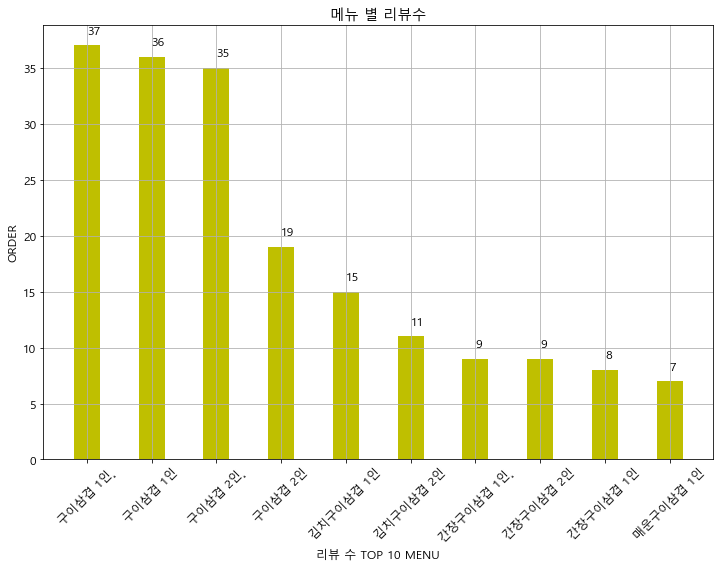

In [46]:
split_menu_dict={} # 전역변수 초기화
total_score_dict={}
taste_score_dict={}
quantity_score_dict={}
delivery_score_dict={}

print("메뉴명 추출 및 주문량, 별점 데이터 저장 시작\n")
for entry in soup.findAll('li', class_ = 'list-group-item star-point ng-scope'):
    #person = entry.find('span', class_ = 'review-id ng-binding').text
    menu = entry.find('div', class_ = 'order-items default ng-binding').text
    #comment = entry.find('p', class_ = 'ng-binding').text
    taste_score = int(entry.find('span', {'class' : 'points ng-binding', 'ng-show' : 'review.rating_taste > 0'}).text)
    quantity_score = int(entry.find('span', {'class' : 'points ng-binding', 'ng-show' : 'review.rating_quantity > 0'}).text)
    delivery_score = int(entry.find('span', {'class' : 'points ng-binding', 'ng-show' : 'review.rating_delivery > 0'}).text)
    total_score = len(entry.findAll('span', class_ = 'full ng-scope'))

    #print('Reviewer: ', person)
    #print('Menu: ', menu)
    #print('Comment', comment)
    #print('Total:', total_score, '\tTaste:', taste_score, '\tQuantity:', quantity_score, '\tDelivery:', delivery_score)
    #print('\n\n\n\n')
    
    # 1. 메뉴 string에서 메뉴이름만 list 형태로 저장
    output_list=split_menu(menu)
    
    # 2. 메뉴, 주문량, total_score, taste_score, quantity_score, delivery_score을 dict형태로 저장
    dict_menu(output_list)
    

print("메뉴명 추출 및 주문량, 별점 데이터 저장 완료\n")

# 3. list에 저장한 주문량 기준 내림차순 정렬
output_dict_sorted=sorted(split_menu_dict.items(), key=operator.itemgetter(1), reverse=True)
print("주문량 내림차순 정렬 완료\n") 

# 4. 메뉴, 주문수, 토탈별점 합, 맛 별점 합, 양 별점 합, 배달별점 합을 저장할 빈 리스트 생성
menu=[] 


# 5. dict value에 저장된 list를 꺼내서
# menu=[메뉴,주문량,토탈별점 합, 맛 별점 합, 양 별점 합, 배달별점 합] 으로 저장
for i in range(len(output_dict_sorted)):
    v=list(output_dict_sorted[i][1])
    menu.append([output_dict_sorted[i][0], v[0],v[1],v[2],v[3],v[4]])

    

# 한글폰트 encoding가능하도록 폰트 설정
matplotlib.rcParams['font.family']='Malgun Gothic' # 한글패치

# 6. menu 리스트를 dataframe으로 저장

dataframe=pd.DataFrame(menu)
#dataframe.to_csv('c:/python/menu_order_Mac_list.csv',header=False, index=False,encoding='utf-8-sig')

# column명 바꾸기
dataframe.columns=['메뉴','주문량','total_sum','taste_sum','quantity_sum','delivery_sum']

# 7. 상위 10개 메뉴만 뽑아서 part_menu 리스트에 저장
part_menu=dataframe.loc[0:9] # 상위 10개 메뉴정보 따로 저장


MENU=part_menu['메뉴'] # 메뉴 리스트 저장
ORDER=part_menu['주문량'] # 주문량 리스트 저장

index=np.arange(len(MENU)) # index에 메뉴갯수(10개)로 0~10 순차적 할당, 어레이 생성


print("그래프 생성 시작\n")

plt.rcParams["figure.figsize"] = (12,8) # 그래프 사이즈 설정, (가로inch, 세로inch)
plt.rc('font',size=12) # 폰트 사이즈 설정

width_size=0.4 # 막대기 두께 설정

plt.bar(index , ORDER , color='y' , tick_label=MENU , width=width_size )
#plt.bar(x축에 할당할 어레이 , y축에 할당할 어레이, 컬러 yellow, x축에 붙일 라벨 어레이, 두께 0.4 )

plt.xticks(rotation=45)
# x축 라벨(메뉴이름)이 길어서 겹치니까 45도 틀어서 표기

plt.grid(True)
# grid 설정

plt.xlabel('리뷰 수 TOP 10 MENU') # x축 설명
plt.ylabel('ORDER') # y축 설명
plt.title('메뉴 별 리뷰수') # 그래프 설명

# 8. 각 막대기 위에 주문량 표기
for i in np.arange(0,10):
    plt.text(width_size*2.5*i, ORDER[i]+1,ORDER[i])
    # plt.text(표시할 x축 좌표, 표시할 y축 좌표, 표시할 내용)



plt.show()
       

In [38]:
part_menu # 저장된 TOP 10 메뉴 보기

,메뉴,주문량,total_sum,taste_sum,quantity_sum,delivery_sum
0,구이삼겹 1인¸,37,177,176,177,171
1,구이삼겹 1인,36,171,172,172,167
2,구이삼겹 2인¸,35,168,168,164,161
3,구이삼겹 2인,19,86,86,87,86
4,김치구이삼겹 1인,15,70,67,73,68
5,김치구이삼겹 2인,11,49,48,49,42
6,간장구이삼겹 1인¸,9,45,45,45,40
7,간장구이삼겹 2인,9,45,44,45,40
8,간장구이삼겹 1인,8,35,37,37,35
9,매운구이삼겹 1인,7,35,35,34,30


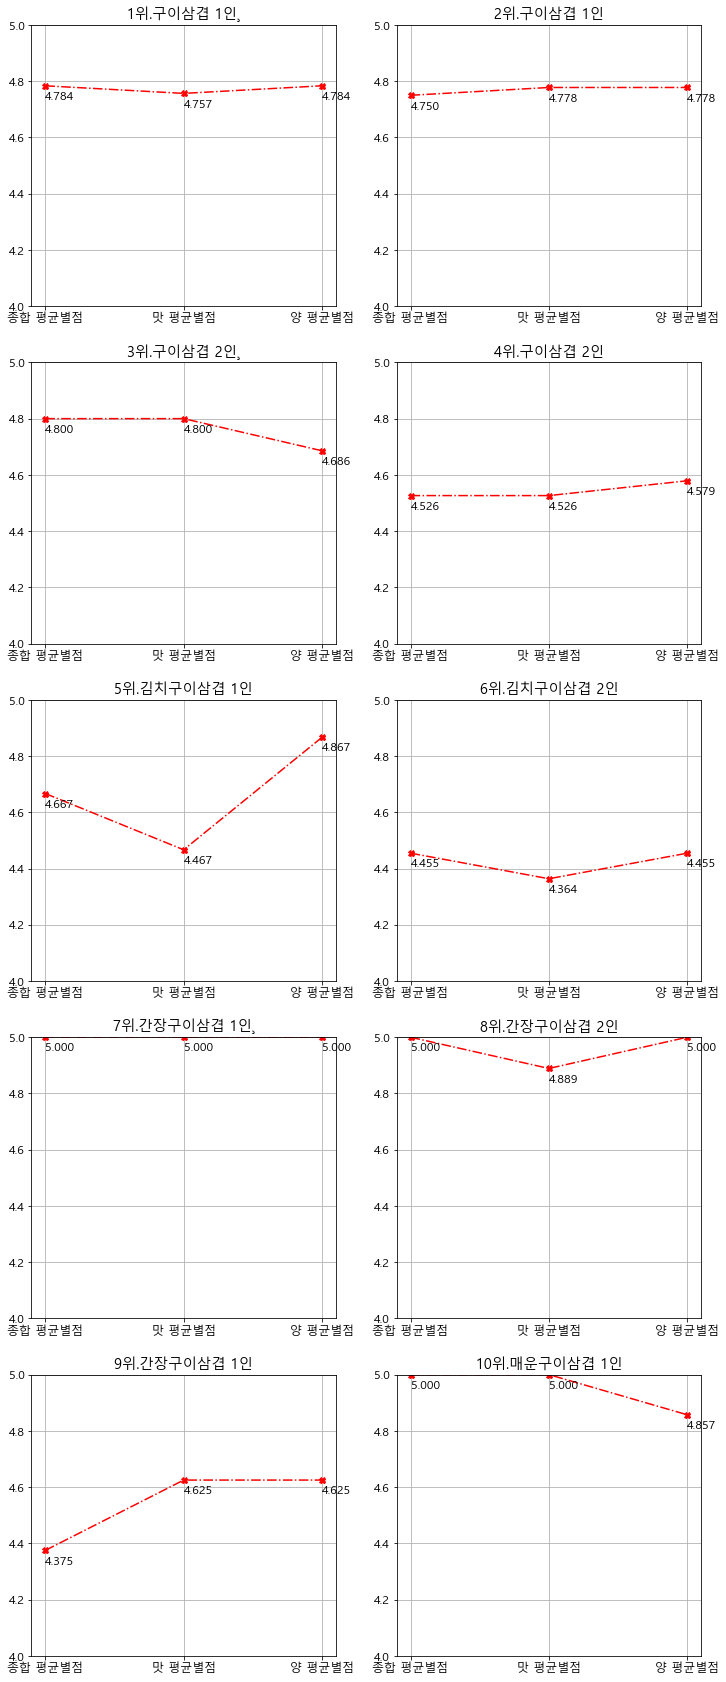

In [45]:
for i in np.arange(len(part_menu)):
    MENU=part_menu['메뉴'][i] 
    # i번째 메뉴 할당
    
    TOTAL=part_menu['total_sum'][i]/part_menu['주문량'][i]
    # i번째 평균 토탈 별점 할당
    
    TASTE=part_menu['taste_sum'][i]/part_menu['주문량'][i]
    # i번째 평균 맛 별점 할당
    
    QUANTITY=part_menu['quantity_sum'][i]/part_menu['주문량'][i]
    # i번째 평균 양 별점 할당
    
    plt.rcParams["font.size"] = 12 
    # 폰트사이즈 설정
    
    plt.rcParams["figure.figsize"] = (12,30) 
    # 그래프 사이즈 설정
    
    plt.subplot(5,2,i+1) 
    # 그래프 배열 설정 
    # plt.subplot(5행, 2열, 총 10개 자리중 어디에 그릴것인지 설정)
    
    plt.ylim([4.0, 5.0])
    # y축 범위 설정( 4.0 ~ 5.0 )
    
    plt.plot(['종합 평균별점','맛 평균별점','양 평균별점'],[TOTAL,TASTE,QUANTITY],'-.Xr')
    # plt.plot( x축 라벨 설정, y축 값 설정, 점선종류 red )
    
    plt.title("{0}위.".format(i+1)+MENU)
    # 그래프 제목 설정
    
    
    # 그래프에 y축 값 표시하기
    # plt.text( x축 위치, y축위치, 표시할 값)
    # 소수점 3자리까지 표시
    
    plt.text('종합 평균별점', float(format(TOTAL,".3f"))-0.05, format(TOTAL,"0.3f"))
    plt.text('맛 평균별점', float(format(TASTE,".3f"))-0.05, format(TASTE,"0.3f"))
    plt.text('양 평균별점', float(format(QUANTITY,".3f"))-0.05, format(QUANTITY,"0.3f"))
    
    plt.grid()

In [40]:
driver.close() # 크롬창 닫고싶을때 실행